<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from detectorusoutlierus import outliers as do

In [2]:
df = pd.read_csv('C:/Users/Дмитрий/Desktop/ML_VVSU/ds_salaries.csv')
del df['work_year']
df

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
df.info()#пустых данных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   experience_level    3755 non-null   object
 1   employment_type     3755 non-null   object
 2   job_title           3755 non-null   object
 3   salary              3755 non-null   int64 
 4   salary_currency     3755 non-null   object
 5   salary_in_usd       3755 non-null   int64 
 6   employee_residence  3755 non-null   object
 7   remote_ratio        3755 non-null   int64 
 8   company_location    3755 non-null   object
 9   company_size        3755 non-null   object
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['employee_residence'] = label_encoder.fit_transform(df['employee_residence'])
df_clust = df[["salary_in_usd", "employee_residence"]]

<Axes: >

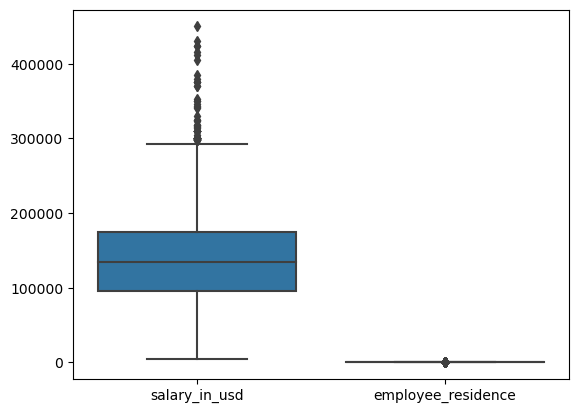

In [5]:
sns.boxplot(df_clust)

In [6]:
from statistics import median, mean
from sklearn.cluster import DBSCAN

class Outline:
  def __init__(self, df):
    self.df = df
  def detec_otline_by_showene(self, column_name):
        res = []
        n = self.df[column_name].count()
        mean = self.df[column_name].mean()
        std = self.df[column_name].std()
        for index, value in self.df.iterrows():
            if math.erfc((abs(value[column_name] - mean)) / std) < 1 / (2 * n):
                res.append((index, value[column_name]))
            else:
                n -= 1
        return res

  def detect_outline_by_quantile(self, column_name):
        Q1 = self.df[column_name].quantile(0.25)
        Q3 = self.df[column_name].quantile(0.75)
        minimum = Q1 - 1.5 * (Q3 - Q1)
        maximum = Q3 + 1.5 * (Q3 - Q1)
        outliers = self.df[(self.df[column_name] < minimum) | (self.df[column_name] > maximum)]
        return outliers.items()

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result
  def detect_outline_by_mean_std(self,column_name,coef):
        mean = self.df[column_name].mean()
        median = self.df[column_name].median()
        std = self.df[column_name].std()
        n = self.df[column_name].count()
        lower_bound = mean - coef  * std
        upper_bound = mean + coef * std
        outliners = self.df[(self.df[column_name] >= lower_bound) & (self.df[column_name]<=upper_bound)]
        return outliners.items()
  def detect_outliner_by_DBSCAN(self, col1, col2, eps, min_samples=2):
        data = self.df[[col1, col2]].to_numpy()

        db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
        labels = db.labels_

        # Вычисление количества элементов в каждом кластере
        unique, counts = np.unique(labels, return_counts=True)
        clusters_counts = dict(zip(unique, counts))
        print(labels)
        # Поиск кластеров с количеством элементов <= 2
        small_clusters = [cluster for cluster, count in clusters_counts.items() if count <= 2]
        print(small_clusters)

        # Возвращение индексов строк для этих кластеров
        outlier_indices = self.df.index[np.isin(labels, small_clusters)].tolist()

        return outlier_indices

In [7]:
outliner_detector = do.Outline(df_clust)


In [8]:
df_clust

,salary_in_usd,employee_residence
0,85847,26
1,30000,75
2,25500,75
3,175000,11
4,120000,11
...,...,...
3750,412000,75
3751,151000,75
3752,105000,75
3753,100000,75


In [9]:
outliners = outliner_detector.detect_outlier_kvart("salary_in_usd")
df_clust = pd.concat([df_clust,outliners,outliners]).drop_duplicates(keep=False)

<Axes: >

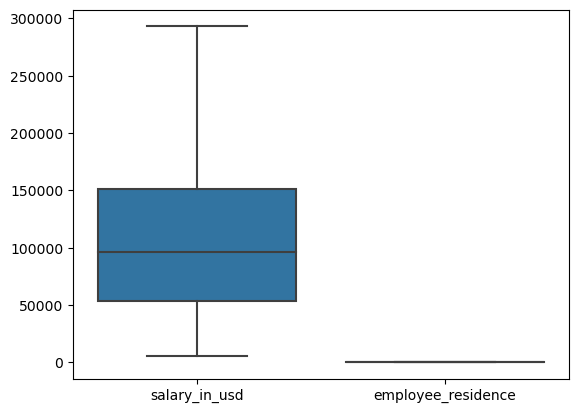

In [10]:
sns.boxplot(df_clust)

In [11]:
df_clust.describe()

,salary_in_usd,employee_residence
count,789.000000,789.000000
mean,106920.624842,48.419518
std,68599.272141,25.738635
min,5132.000000,0.000000
25%,53192.000000,28.000000
50%,96100.000000,54.000000
75%,151410.000000,75.000000
max,293000.000000,77.000000


In [12]:

df_clust.columns

Index(['salary_in_usd', 'employee_residence'], dtype='object')

In [13]:
df_clust

,salary_in_usd,employee_residence
0,85847,26
1,30000,75
2,25500,75
7,219000,11
8,141000,11
...,...,...
3744,45618,34
3745,168000,44
3746,119059,68
3748,28369,53


C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_11508\3274830089.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clust['salary_in_usd'], hist=True, kde=False,


<Axes: xlabel='salary_in_usd'>

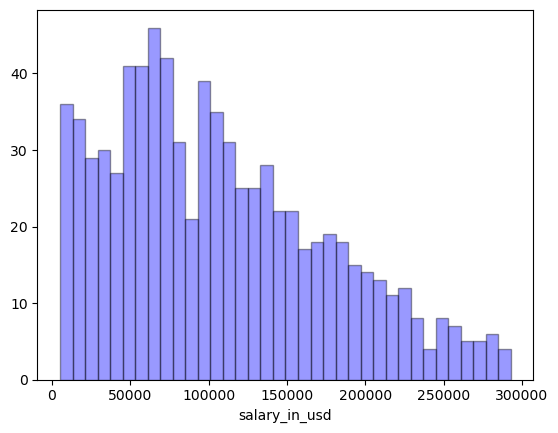

In [14]:
sns.distplot(df_clust['salary_in_usd'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_11508\3959998740.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clust['employee_residence'], hist=True, kde=False,


<Axes: xlabel='employee_residence'>

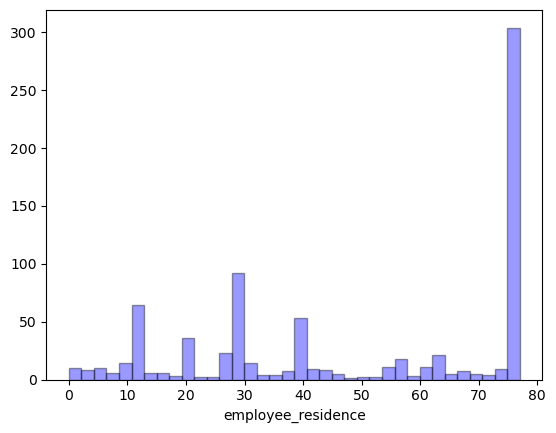

In [15]:
sns.distplot(df_clust['employee_residence'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [16]:

min_max_scaler = MinMaxScaler()
min_max_scal = min_max_scaler.fit_transform(df_clust[['employee_residence','salary_in_usd']])
df_clust[['employee_residence','salary_in_usd']] = min_max_scal
df_clust.salary_in_usd.unique()
     

array([0.28038893, 0.08638682, 0.07075465, 0.74293774, 0.47198021,
       0.78114969, 0.4796226 , 0.29481568, 0.23228702, 0.86174219,
       0.62340378, 0.34824294, 0.20623341, 0.32955382, 0.05506691,
       0.69298428, 0.36665416, 0.92254436, 0.75156669, 0.7212264 ,
       0.89231175, 0.74120083, 0.67380188, 0.68839885, 0.41153584,
       0.63910542, 0.88102186, 0.78636042, 0.58140537, 0.95484041,
       0.95518779, 0.56612058, 0.65435547, 0.2081857 , 0.50324454,
       0.22447441, 0.31766643, 0.549085  , 0.4889498 , 0.73599011,
       0.60457571, 0.30975308, 0.38669807, 0.84124668, 0.4441897 ,
       0.17856795, 0.96595662, 0.72626343, 0.5939111 , 0.46428224,
       0.27143691, 0.7193158 , 0.05397613, 0.17213792, 0.12992413,
       0.0342796 , 0.16855642, 0.76030681, 0.59356372, 0.21949644,
       0.24277794, 0.91871274, 0.40910417, 0.28875735, 1.        ,
       0.5133186 , 0.38895605, 0.50150764, 0.42360735, 0.74479623,
       0.48974877, 0.60398516, 0.1234281 , 0.93747134, 0.15586

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

calinsk_score = []
sillhouette_score = []
davies_score = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=42)
    kmeans.fit(df_clust)
    calinsk_score.append(calinski_harabasz_score(df_clust,kmeans.labels_))
    sillhouette_score.append(silhouette_score(df_clust,kmeans.labels_))
    davies_score.append(davies_bouldin_score(df_clust,kmeans.labels_))

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

In [18]:
print(f"Число кластеров calinski_harabasz_score - {calinsk_score.index(max(calinsk_score))+2} c баллом {max(calinsk_score)}")
print(f"Число кластеров silhouette_score - {sillhouette_score.index(max(sillhouette_score))+2} c баллом {max(sillhouette_score)}")
print(f"Число кластеров davies_bouldin_score - {davies_score.index(min(davies_score))+2} c баллом {max(davies_score)}")

Число кластеров calinski_harabasz_score - 10 c баллом 1420.2074303545426
Число кластеров silhouette_score - 2 c баллом 0.5640909522402695
Число кластеров davies_bouldin_score - 3 c баллом 0.8440486538005734


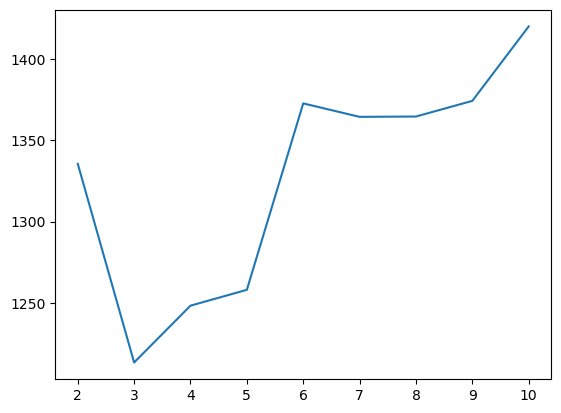

In [19]:
plt.plot(range(2,11),calinsk_score)

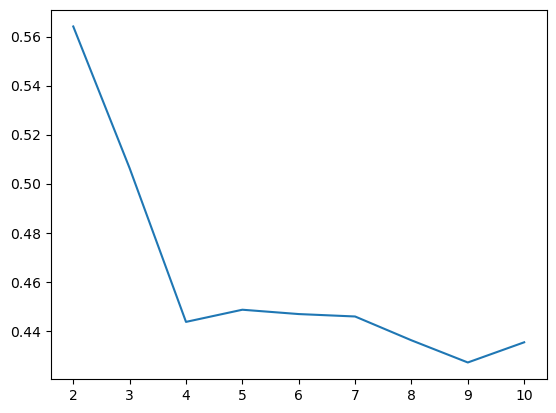

In [20]:
plt.plot(range(2,11),sillhouette_score)

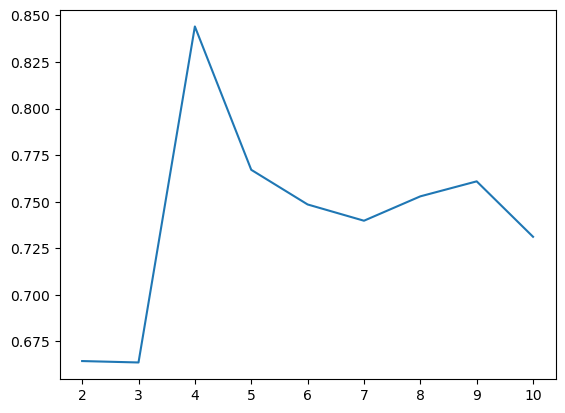

In [21]:
plt.plot(range(2,11),davies_score)

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


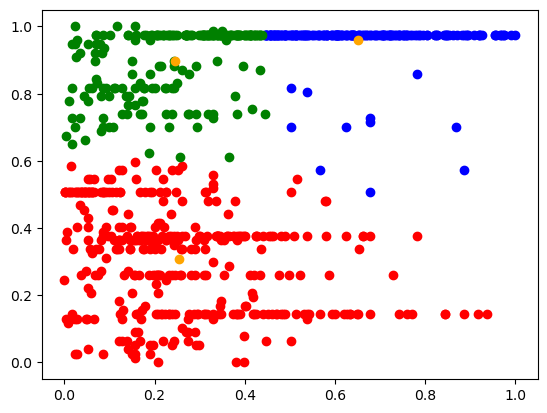

In [23]:
kmean2 = KMeans(n_clusters=3)
clusters = kmean2.fit_predict(df_clust)

df_clust["label"] = clusters

plt.scatter(df_clust.salary_in_usd[df_clust.label == 0], df_clust.employee_residence[df_clust.label == 0], color="red")
plt.scatter(df_clust.salary_in_usd[df_clust.label == 1], df_clust.employee_residence[df_clust.label == 1], color="blue")
plt.scatter(df_clust.salary_in_usd[df_clust.label == 2], df_clust.employee_residence[df_clust.label == 2], color="green")
plt.scatter(df_clust.salary_in_usd[df_clust.label == 3], df_clust.employee_residence[df_clust.label == 3], color="purple")

plt.scatter(kmean2.cluster_centers_[:,0],kmean2.cluster_centers_[:,1], color="orange")

plt.show()

In [24]:
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clust)

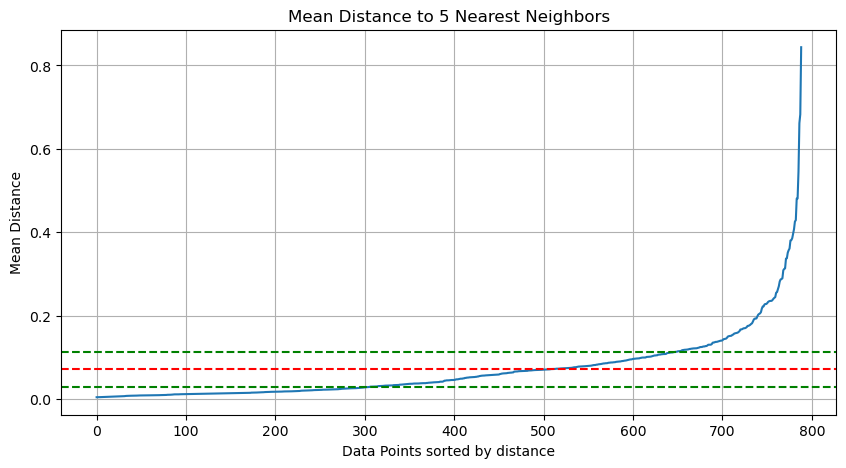

Оптимальный EPS = 0.07102795231727752


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(X_scaled):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1 - v2) for j, v2 in enumerate(X_scaled) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

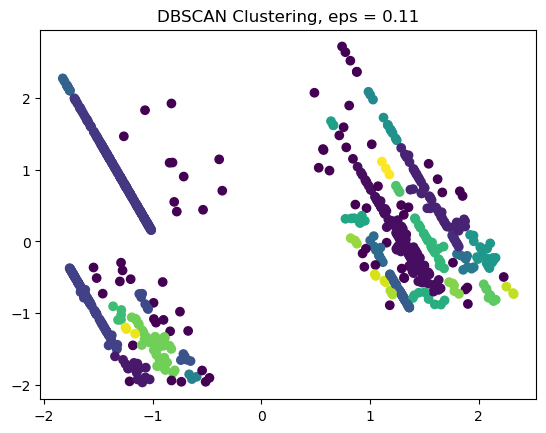

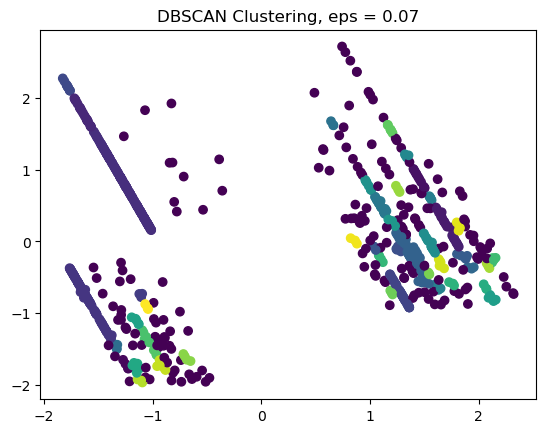

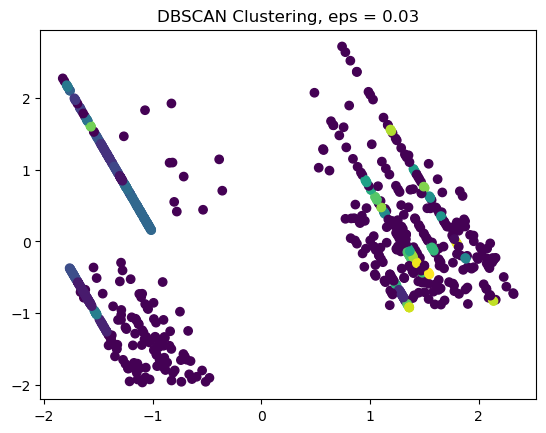

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Создаем объект PCA и снижаем размерность до 2 компонент, чтобы визуализировать на двумерном графике
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

for eps in [np.mean(neighbours) + np.std(neighbours) / 2, np.mean(neighbours), np.mean(neighbours) - np.std(neighbours) / 2]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(X_scaled)
  labels = dbscan.labels_

  # Визуализация результатов, темные точки - выбросы
  plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()

In [29]:
from ydata_profiling import ProfileReport
df_clust['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, -1)


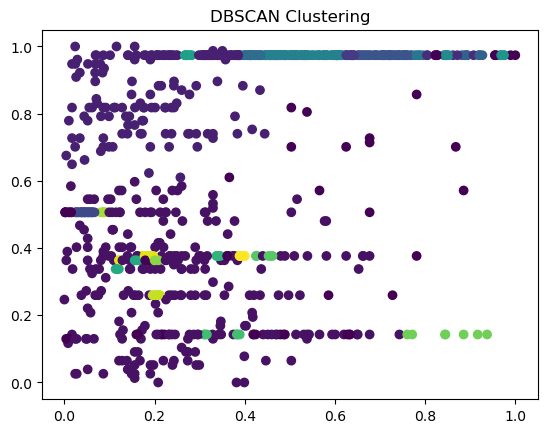

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

x_scaler = StandardScaler().fit_transform(df_clust)

# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=5)
dbscan.fit(x_scaler)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(df_clust.to_numpy()[:, 0], df_clust.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

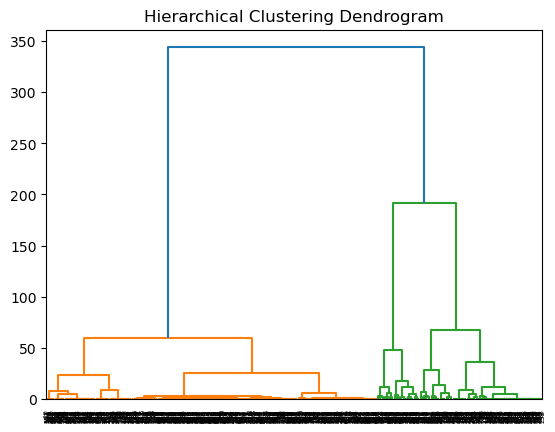

In [31]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Инициализация и обучение модели иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(df_clust)

# Визуализация дендрограммы
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(df_clust, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

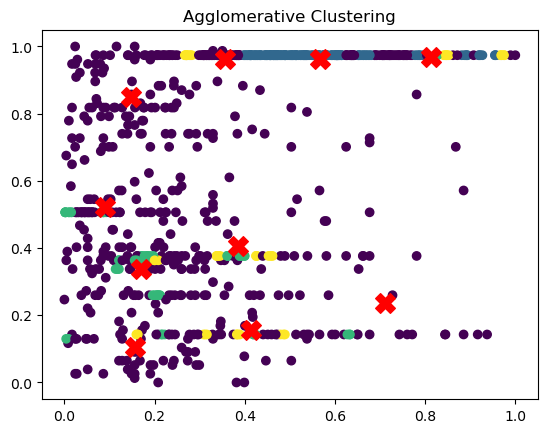

In [32]:
# Визуализация результатов кластеризации
plt.scatter(df_clust.to_numpy()[:, 0], df_clust.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.title('Agglomerative Clustering')
plt.show()

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Оптимальное число кластеров 4, с баллом 0.5869537843273935


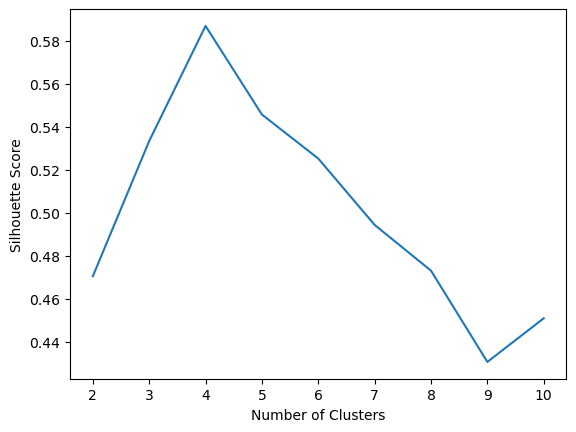

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clust)

# Поиск оптимального K
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Оптимальное число кластеров 5, с баллом 1061.8993241405706


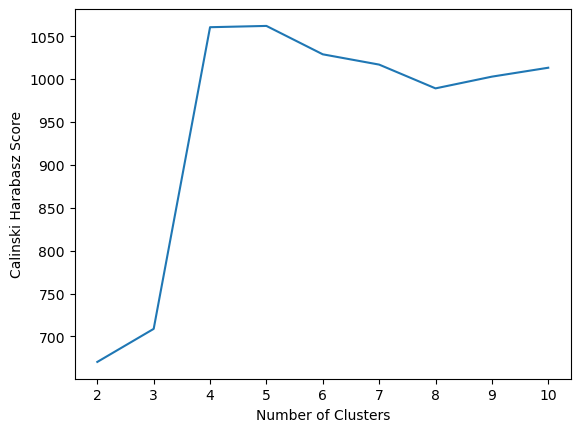

In [34]:
from sklearn.metrics import calinski_harabasz_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = calinski_harabasz_score(X_scaled, kmeans.labels_)
    scores.append(score)

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Оптимальное число кластеров 4, с баллом 0.6341925842888444


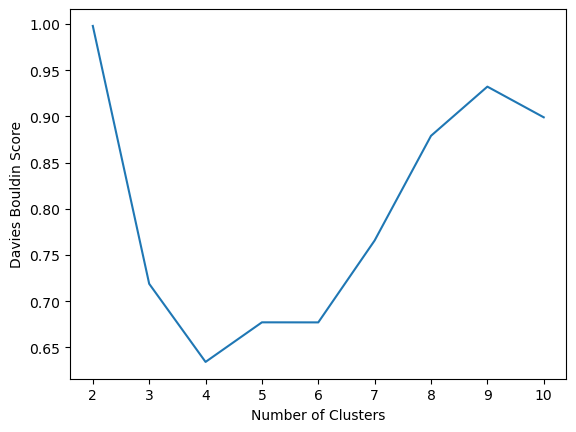

In [35]:
from sklearn.metrics import davies_bouldin_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = davies_bouldin_score(X_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(min(scores)) + 2}, с баллом {min(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnin

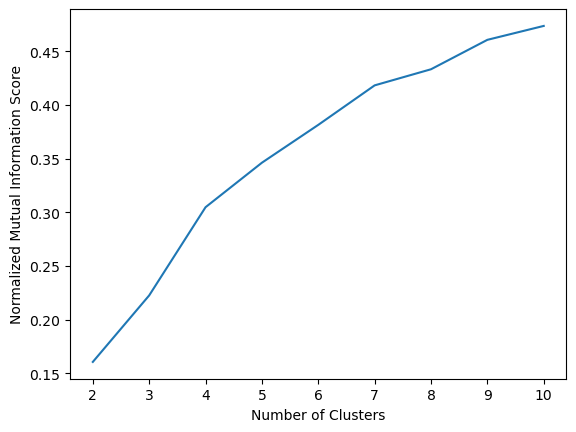

Оптимальное число кластеров 10, с баллом 0.4735202294744142


In [36]:
from sklearn.metrics import normalized_mutual_info_score

# Предположим, что y_true - это истинные метки
y_true = df_clust['salary_in_usd'].to_numpy()
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = normalized_mutual_info_score(y_true, kmeans.labels_, average_method='arithmetic')
    scores.append(score)

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Normalized Mutual Information Score')
plt.show()

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

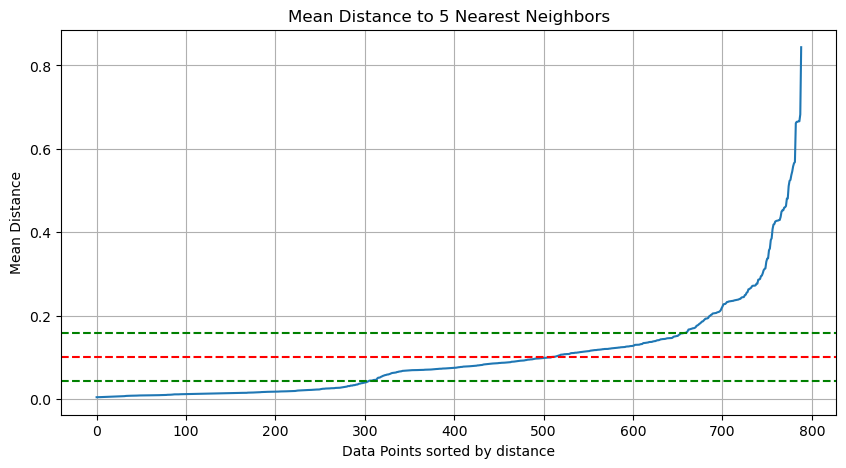

Оптимальный EPS = 0.1005425227094697


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(X_scaled):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1 - v2) for j, v2 in enumerate(X_scaled) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

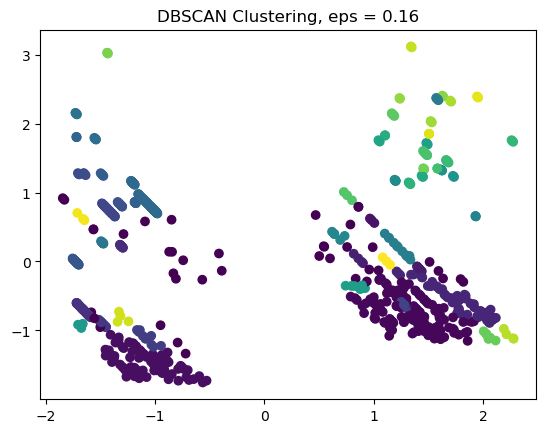

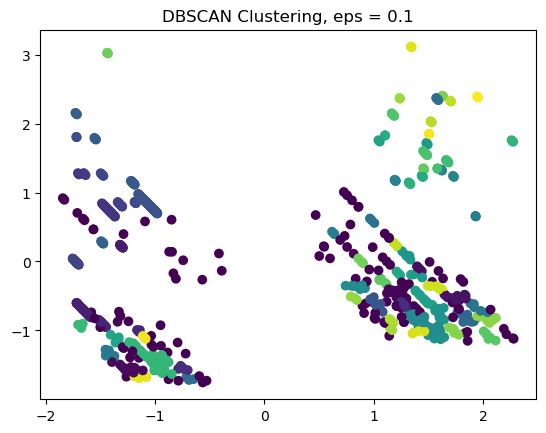

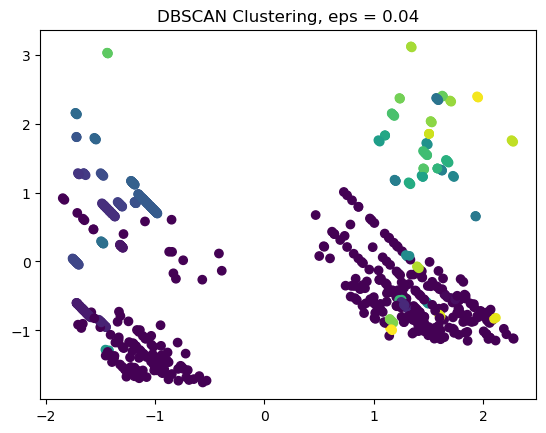

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Создаем объект PCA и снижаем размерность до 2 компонент, чтобы визуализировать на двумерном графике
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

for eps in [np.mean(neighbours) + np.std(neighbours) / 2, np.mean(neighbours), np.mean(neighbours) - np.std(neighbours) / 2]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(X_scaled)
  labels = dbscan.labels_

  # Визуализация результатов, темные точки - выбросы
  plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()

In [39]:
df_cluster = df[["salary_in_usd","employee_residence",'salary']]

In [40]:
x1 = df_cluster["salary_in_usd"]
x2 = df_cluster["employee_residence"]
x3 = df_cluster["salary"]
x = np.array([[i, j, k] for i, j, k in zip(x1, x2, x3)])
x = StandardScaler().fit_transform(x)
x[:5]

array([[-0.82039118, -2.08756459, -0.16482684],
       [-1.70618745,  0.46018613, -0.23927735],
       [-1.77756251,  0.46018613, -0.2459779 ],
       [ 0.59367574, -2.86748828, -0.02337087],
       [-0.27868616, -2.86748828, -0.10526643]])

Text(0.5, 1.0, 'Результат PCA (2 компоненты)')

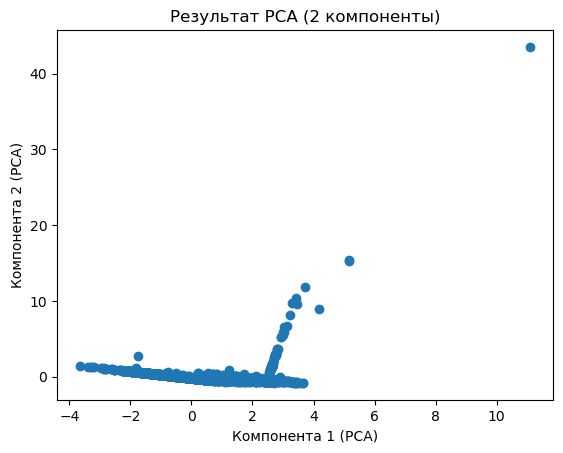

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Создаем объект PCA и снижаем размерность до 2 компонент
pca = PCA(n_components=2)
data_pca = pca.fit_transform(x)

# Восстановим данные обратно в исходное пространство (для демонстрации)
data_restored = pca.inverse_transform(data_pca)
plt.scatter(data_pca[:,0], data_pca[:,1])
plt.xlabel('Компонента 1 (PCA)')
plt.ylabel('Компонента 2 (PCA)')
plt.title('Результат PCA (2 компоненты)')

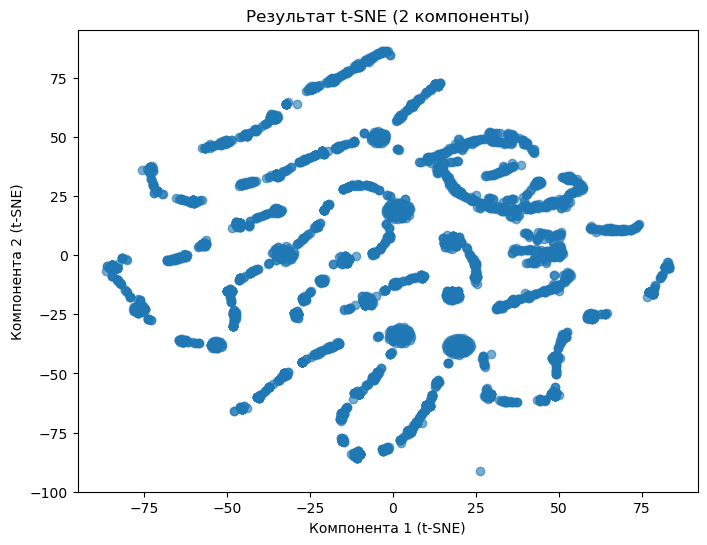

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Создаем объект t-SNE и снижаем размерность до 2 компонент
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(x)

# Визуализируем данные после применения t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.6)
plt.xlabel('Компонента 1 (t-SNE)')
plt.ylabel('Компонента 2 (t-SNE)')
plt.title('Результат t-SNE (2 компоненты)')
plt.show()

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех